#Importing Dataset and Necessary Libraries 


In [0]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand

In [0]:
#Here we read the dataset containing the rainfall data
#of states all over India.
url = "https://raw.githubusercontent.com/Vaibhav911/Rainfall-Pattern-Analysis/master/Sub_Division_IMD_2017.csv"
data = pd.read_csv(url)
data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


#Data Cleaning

##Handling Missing data
By Means - Here, we use mean of the column grouped by states to fill the missing values.

In [0]:
mean_rainfall = data.groupby('SUBDIVISION').mean() 
#SUBDIVISION column header in the dataset indicates States.

In [0]:
mean_rainfall

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
SUBDIVISION,,,,,,,,,,,,,,,,,,
Andaman & Nicobar Islands,1959.946429,54.382143,27.685714,31.594545,71.916364,354.829730,470.083636,399.047273,398.613636,440.382569,289.989091,233.018182,157.466972,2926.373585,82.067857,459.419266,1703.708257,678.759633
Arunachal Pradesh,1966.848485,46.716327,90.883673,153.972165,265.387879,356.693939,641.817347,691.165306,491.307071,432.005051,194.793814,35.149485,24.079381,3403.959140,137.602041,777.810309,2258.214433,253.648958
Assam & Meghalaya,1959.000000,16.860684,31.363248,79.221368,205.102564,340.849573,508.741880,494.565812,403.389744,310.693162,152.497436,26.892308,8.955556,2579.133333,48.220513,625.179487,1717.388889,188.353846
Bihar,1959.000000,13.242735,14.152991,10.194017,16.848718,53.573504,173.158974,325.188889,298.740171,217.835043,62.944444,7.055556,3.631624,1196.563248,27.392308,80.618803,1014.923932,73.638462
Chhattisgarh,1959.000000,14.023932,18.966667,15.245299,16.530769,20.989744,197.859829,398.082906,388.828205,218.102564,63.780342,11.572650,5.158974,1369.136752,32.988034,52.768376,1202.876923,80.505983
Coastal Andhra Pradesh,1959.000000,7.377778,12.710256,13.132479,26.384615,62.776068,124.474359,173.286325,175.895726,181.731624,183.901709,77.082906,11.550427,1050.304274,20.085470,102.296581,655.380342,272.535897
Coastal Karnataka,1959.000000,1.918103,1.492308,6.271795,30.501709,122.597436,842.282051,1121.294872,710.791453,299.165812,183.646154,62.809402,12.508547,3397.637931,3.326724,159.360684,2973.528205,258.965812
East Madhya Pradesh,1959.000000,19.282051,18.449573,13.571795,7.066667,9.364957,140.482051,372.773504,368.536752,193.340171,39.416239,12.494017,8.260684,1203.035043,37.730769,30.000855,1075.136752,60.175214
East Rajasthan,1959.000000,6.389744,5.328205,4.518803,3.096581,9.862393,63.611111,224.824786,219.015385,97.043590,14.394017,4.794017,3.617949,656.501709,11.715385,17.484615,604.490598,22.807692


In [0]:
mean_rainfall = mean_rainfall.values  #Converted into Numpy

In [0]:
df = data.groupby('SUBDIVISION')  #Here df is dataframe
# states = df.groups.keys()
states=data['SUBDIVISION'].unique()

In [0]:
dataset = data.values  #Converted into Numpy

In [0]:
#Here we use a dictionary to map states to integers and vice versa
index=0
state_to_index = {}
index_to_state = {}
for key in states:
  state_to_index[key] = index
  index_to_state[index] = key
  index=index+1 

In [0]:
state_to_index  #Maps States to integers.

{'Andaman & Nicobar Islands': 0,
 'Arunachal Pradesh': 1,
 'Assam & Meghalaya': 2,
 'Bihar': 8,
 'Chhattisgarh': 26,
 'Coastal Andhra Pradesh': 27,
 'Coastal Karnataka': 31,
 'East Madhya Pradesh': 19,
 'East Rajasthan': 17,
 'East Uttar Pradesh': 9,
 'Gangetic West Bengal': 5,
 'Gujarat Region': 20,
 'Haryana Delhi & Chandigarh': 12,
 'Himachal Pradesh': 14,
 'Jammu & Kashmir': 15,
 'Jharkhand': 7,
 'Kerala': 34,
 'Konkan & Goa': 22,
 'Lakshadweep': 35,
 'Madhya Maharashtra': 23,
 'Matathwada': 24,
 'Naga Mani Mizo Tripura': 3,
 'North Interior Karnataka': 32,
 'Orissa': 6,
 'Punjab': 13,
 'Rayalseema': 29,
 'Saurashtra & Kutch': 21,
 'South Interior Karnataka': 33,
 'Sub Himalayan West Bengal & Sikkim': 4,
 'Tamil Nadu': 30,
 'Telangana': 28,
 'Uttarakhand': 11,
 'Vidarbha': 25,
 'West Madhya Pradesh': 18,
 'West Rajasthan': 16,
 'West Uttar Pradesh': 10}

In [0]:
index_to_state  #Maps Integers to States.

{0: 'Andaman & Nicobar Islands',
 1: 'Arunachal Pradesh',
 2: 'Assam & Meghalaya',
 3: 'Naga Mani Mizo Tripura',
 4: 'Sub Himalayan West Bengal & Sikkim',
 5: 'Gangetic West Bengal',
 6: 'Orissa',
 7: 'Jharkhand',
 8: 'Bihar',
 9: 'East Uttar Pradesh',
 10: 'West Uttar Pradesh',
 11: 'Uttarakhand',
 12: 'Haryana Delhi & Chandigarh',
 13: 'Punjab',
 14: 'Himachal Pradesh',
 15: 'Jammu & Kashmir',
 16: 'West Rajasthan',
 17: 'East Rajasthan',
 18: 'West Madhya Pradesh',
 19: 'East Madhya Pradesh',
 20: 'Gujarat Region',
 21: 'Saurashtra & Kutch',
 22: 'Konkan & Goa',
 23: 'Madhya Maharashtra',
 24: 'Matathwada',
 25: 'Vidarbha',
 26: 'Chhattisgarh',
 27: 'Coastal Andhra Pradesh',
 28: 'Telangana',
 29: 'Rayalseema',
 30: 'Tamil Nadu',
 31: 'Coastal Karnataka',
 32: 'North Interior Karnataka',
 33: 'South Interior Karnataka',
 34: 'Kerala',
 35: 'Lakshadweep'}

In [0]:
#Here we replace the missing values by the column means grouped by states.
for row in range(0,len(dataset)):
  for col in range(2,len(dataset[1])):
    if np.isnan(dataset[row,col]):
      dataset[row,col]=mean_rainfall[state_to_index[dataset[row,0]],col-1]

In [0]:
dataset=pd.DataFrame(dataset)  #Converted to Pandas
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0,159.8,12.2,0,446.1,537.1,228.9,753.7,666.2,197.2,359,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144,0,1,235.1,479.9,728.4,326.7,339,181.2,284.4,225,2957.4,156.7,236.1,1874,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0,202.4,304.5,495.1,502,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571
4,Andaman & Nicobar Islands,1905,1.3,0,3.3,26.9,279.5,628.7,368.7,330.5,297,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180,72.8,78.1,26.7,1426.3,60.6,131.1,1057,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59,62.3,1395,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231,159,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32,74.7,1065.7,71.7,83.2,745.4,165.4


In [0]:
#To retain Column headers as after converting to numpy the column headers are lost
dataset.columns = ['SUBDIVISION','YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JF','MAM','JJAS','OND']

In [0]:
dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0,159.8,12.2,0,446.1,537.1,228.9,753.7,666.2,197.2,359,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144,0,1,235.1,479.9,728.4,326.7,339,181.2,284.4,225,2957.4,156.7,236.1,1874,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0,202.4,304.5,495.1,502,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571
4,Andaman & Nicobar Islands,1905,1.3,0,3.3,26.9,279.5,628.7,368.7,330.5,297,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180,72.8,78.1,26.7,1426.3,60.6,131.1,1057,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59,62.3,1395,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231,159,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32,74.7,1065.7,71.7,83.2,745.4,165.4


In [0]:
original_dataset=dataset  #Will be used later

#Data Preprocessing

##**Standardization**

In [0]:

# dataset=pd.DataFrame(dataset)
std_rainfall = data.groupby('SUBDIVISION').std() #Standard deviation calculated grouped by states.
std_rainfall = std_rainfall.values  #Converted to Numpy


In [0]:
#Here we standardize the data grouped by states for all 12 months.
standardized_dataset=data.copy()
standardized_dataset=standardized_dataset.values
for row in range(0,len(standardized_dataset)):
  for col in range(2,len(standardized_dataset[1])):
    data_mean = mean_rainfall[state_to_index[standardized_dataset[row,0]],col-1]
    data_std = std_rainfall[state_to_index[standardized_dataset[row,0]],col-1]
    standardized_dataset[row,col]=(standardized_dataset[row,col]-data_mean)/data_std

In [0]:
standardized_dataset=pd.DataFrame(standardized_dataset)
standardized_dataset.columns = ['SUBDIVISION','YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JF','MAM','JJAS','OND']
standardized_dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,-0.0695199,1.5584,-0.0494701,-1.05873,1.16353,0.323524,-0.226897,0.591131,-0.707581,0.998161,2.7868,-0.943975,1.09994,0.641547,0.570209,-0.02587,1.53488
1,Andaman & Nicobar Islands,1902,-0.729552,3.46528,-0.400682,-1.09371,0.610426,0.457256,-1.13723,2.5447,1.48247,-0.940185,1.07966,0.0231143,1.46304,0.919544,-0.00632644,1.68384,0.193121
2,Andaman & Nicobar Islands,1903,-0.559178,3.05086,-0.652728,-1.0785,-0.800766,0.0669776,2.20133,-0.515363,-0.665566,-1.1023,0.44034,0.514661,0.0763768,0.882872,-1.26227,0.594667,0.060269
3,Andaman & Nicobar Islands,1904,-0.603448,-0.340608,-0.652728,1.98441,-0.336611,0.170688,0.688117,-1.70929,2.49478,-0.686872,0.64859,-0.89444,0.377193,-0.68574,0.268376,0.956443,-0.54851
4,Andaman & Nicobar Islands,1905,-0.712112,-0.72618,-0.584551,-0.684614,-0.503814,1.08225,-0.202836,-0.488131,-0.941292,-0.296771,-1.77928,1.42688,-0.885397,-0.955456,-0.84626,-0.275202,-0.244121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,0.548759,0.842901,1.84055,-0.0866467,6.58145,6.3136,0.586253,-0.99257,0.39339,0.998799,10.3621,2.01932,3.1752,0.998816,4.44372,1.90251,3.06414
4184,Lakshadweep,2014,2.26564,-0.0760538,-0.496082,0.877888,3.90018,3.01637,-1.54765,2.25467,-0.149128,3.16603,7.69484,5.66972,3.01022,1.34064,2.05151,1.34743,5.56512
4185,Lakshadweep,2015,-0.977353,-0.859425,-0.545497,8.132,10.4689,3.96697,0.125859,-1.07591,0.170935,3.0806,31.7143,15.5853,4.31688,-1.2761,8.52456,0.797419,11.4332
4186,Lakshadweep,2016,2.6726,-0.276918,-0.580793,-0.357922,5.63563,4.41059,0.186219,-1.70307,-0.791523,0.67956,3.92435,6.94121,1.27451,1.43494,2.33734,0.146538,2.79388


##**Aggregation**

In [0]:
#Here we aggregate the data of each year to decades.
#Each state has mean data wrt decades and for all 12 months.
dataset=dataset.values
dataset=pd.DataFrame(dataset)
decade_data=pd.DataFrame()
row=0
start=1901  #Starting year of decade
end=1910    #Ending year of decade
state=dataset.iat[0,0]  #Indicates state
while row<len(dataset)-1:
  
  temp=pd.DataFrame()  #Temporary dataframe which stores intermediate 10 rows
  flag=0
  while(row<len(dataset)-1 and dataset.iat[row,1]>=start and dataset.iat[row,1]<=end):
    if(dataset.iat[row,0] is not state):
      flag=1
      break
    temp=temp.append(dataset.iloc[row:row+1,1:],ignore_index=True)
    row=row+1
  if(dataset.iat[row,0] is not state):
    flag=1
  start+=10
  end+=10
  temp_mean = temp.mean(axis=0)  #Mean of the rows in a decade

  decade_row = pd.DataFrame()  #decade_row is data for one decade for a particular state
                              #decade_data will store all the decade_rows

  decade_row['DECADE']=start

  decade_row = decade_row.append(temp_mean.T,ignore_index=True,sort=False)  
  if(len(temp_mean)!=0):
    decade_row.iat[0,0]=start-10
  decade_data=decade_data.append(decade_row,ignore_index=True,sort=False)
  if(flag==1):
    start=1901
    end=1910
    state=dataset.iat[row,0]


In [0]:
decade_data.columns = ['DECADE','STATE','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JF','MAM','JJAS','OND']
decade_data=decade_data.drop(decade_data.index[[12]])#Dropped a row as it consists of Nan values

In [0]:
#This code is to retain the State information after Aggregation
cnt=0
minimum=0
for row in range(len(decade_data)):
  year=decade_data.iloc[row,0]
  if(year<minimum):
    cnt=cnt+1
  minimum=year
  decade_data.iloc[row,1]=index_to_state[cnt]



### Final aggregated Data(decade wise)

In [0]:
decade_data

,DECADE,STATE,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1901.0,Andaman & Nicobar Islands,29.711111,57.044444,40.477778,41.388889,416.988889,540.344444,403.377778,420.833333,430.588889,240.100000,309.877778,164.344444,3095.077778,86.755556,498.855556,1795.144444,714.322222
1,1911.0,Andaman & Nicobar Islands,93.140000,10.230000,16.110000,28.970000,316.160000,499.820000,351.840000,364.590000,418.380000,296.770000,205.860000,181.410000,2783.280000,103.370000,361.240000,1634.630000,684.040000
2,1921.0,Andaman & Nicobar Islands,74.090000,34.630000,42.949455,91.110000,315.790000,485.810000,353.360000,376.540000,420.690000,294.630000,252.960000,151.256697,2921.894717,108.720000,454.151927,1636.400000,680.005963
3,1931.0,Andaman & Nicobar Islands,15.260000,27.460000,27.060000,74.691636,353.420000,526.638364,379.334727,498.421364,510.378257,267.318909,219.431818,192.586697,3072.024717,42.720000,462.841927,1914.330826,679.165963
4,1941.0,Andaman & Nicobar Islands,24.916667,31.883333,19.315758,112.436061,298.688288,582.813939,415.091212,353.818939,499.510856,314.981515,147.303030,170.961162,2909.057862,56.800000,430.619878,1769.502752,632.959939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,1971.0,Lakshadweep,4.700000,9.320000,6.590000,38.510000,170.150000,336.160000,310.250000,259.190000,156.940000,148.680000,161.680000,48.130000,1650.300000,14.020000,215.250000,1062.540000,358.490000
428,1981.0,Lakshadweep,15.690000,14.750000,17.730000,26.910000,127.410000,339.920000,236.180000,227.700000,183.140000,119.930000,104.690000,39.730000,1453.780000,30.440000,172.050000,986.940000,264.350000
429,1991.0,Lakshadweep,39.120000,10.830000,8.400000,58.000000,131.290000,349.520000,341.630000,245.050000,133.680000,172.290000,116.410000,67.040000,1673.260000,49.950000,197.690000,1069.880000,355.740000
430,2001.0,Lakshadweep,10.340000,9.350000,19.280000,28.280000,182.530000,324.490000,290.720000,182.430000,201.730000,170.350000,132.820000,53.470000,1605.790000,19.690000,230.090000,999.370000,356.640000


##**Discretization**

###Data Binning wrt frequency

In [0]:
dataset = dataset.values # Converts the dataset to numpy array

####Here we gather all the data points into a list

In [0]:
list_rainfall = []
for i in range(len(dataset)):
  for j in range(2,len(dataset[0])):
    list_rainfall.append(dataset[i,j])
    
list_rainfall.sort() #List is sorted

####Here we create two partitions to classify the data points as High,Medium or Low

In [0]:
partition_1 = list_rainfall[23732]
partition_2 = list_rainfall[47464]

In [0]:
#All data points below partition1 are Low, Above partition2 are High and those in between are Medium.
for i in range(len(dataset)):
  for j in range(2,len(dataset[0])):
    if dataset[i,j]<partition_1:
      dataset[i,j] = 'Low'
    elif dataset[i,j]>=partition_1 and dataset[i,j]<partition_2:
      dataset[i,j] = 'Medium'
    else:
      dataset[i,j] = 'High'

In [0]:
dataset=pd.DataFrame(dataset)
#To retain Column headers
dataset.columns = ['SUBDIVISION','YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL','JF','MAM','JJAS','OND']
categorical_dataset = dataset.values

#Data Visualization

In [0]:
vis_df = original_dataset # pandas dataframe for visualization
vis_df
lis=vis_df['SUBDIVISION'].unique() # to extract all unique subdivisions
temp = pd.DataFrame(index=lis,columns=['low','medium','high'])

In [0]:
category_count = []
for i in temp.index:
  for j in temp.columns:
    temp.loc[i,j]=0
for i in range(len(categorical_dataset)):
  for j in range(2,len(categorical_dataset[0])):
    if categorical_dataset[i,j] is 'Low':
      temp.loc[categorical_dataset[i,0],'low']+=1
    elif categorical_dataset[i,j] is 'Medium':
      temp.loc[categorical_dataset[i,0],'medium']+=1
    elif categorical_dataset[i,j] is 'High':
      temp.loc[categorical_dataset[i,0],'high']+=1

###Categorical Distribution of Rainfall
This bar graph shows the category wise distribution (low,medium,high) of each subdivision.


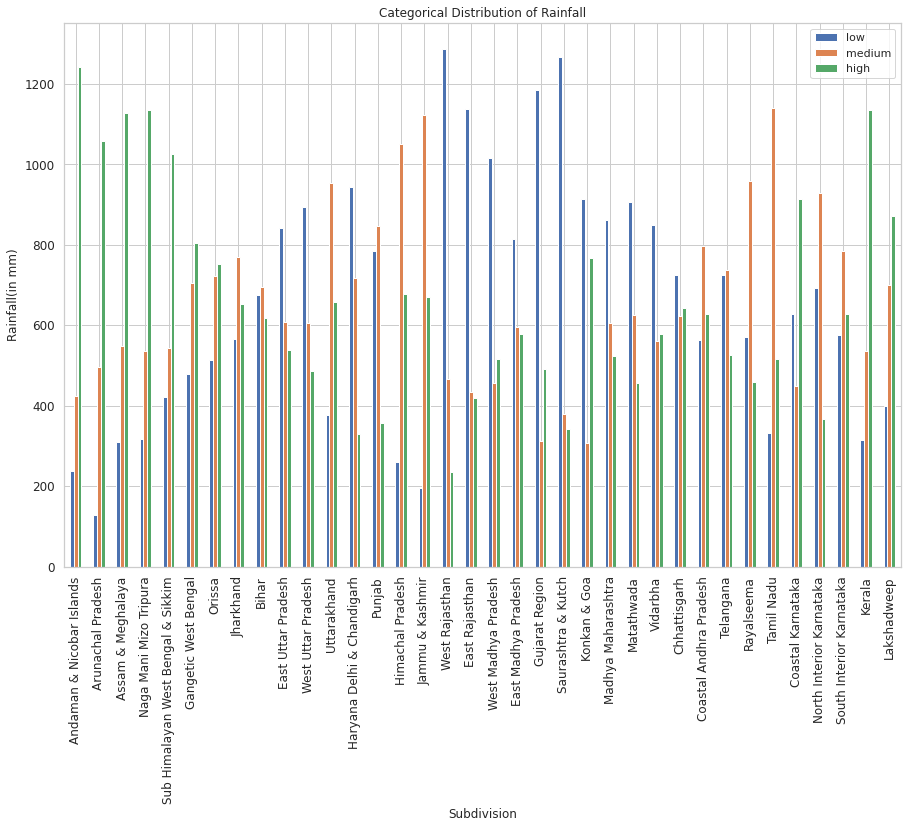

In [0]:
ax=temp[['low','medium','high']].plot(kind='bar',title='Categorical Distribution of Rainfall',figsize=(15,10),legend=True,fontsize=12)
ax.set_xlabel("Subdivision",fontsize=12)
ax.set_ylabel("Rainfall(in mm)",fontsize=12)
plt.show()

### Annual Rainfall Distribution across various Subdivisions
This BoxPlot gives the annual rainfall distribution for every subdivision which can help in identifying various metrics such as median,min,max, 50 percentile etc. for respective subdivisions.

[]

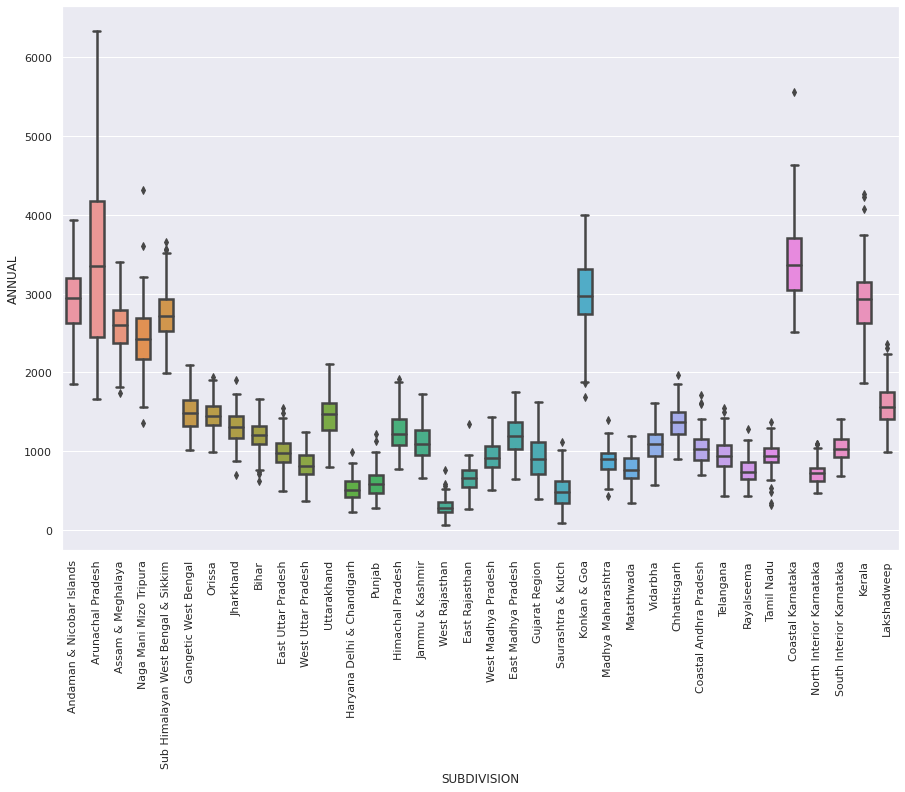

In [0]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15,10)}) 
g=sns.boxplot(x='SUBDIVISION',y='ANNUAL',data=data,linewidth=2.5,width=0.6)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.plot()

###Decade wise distribution of rainfall with respect to different subdivisions

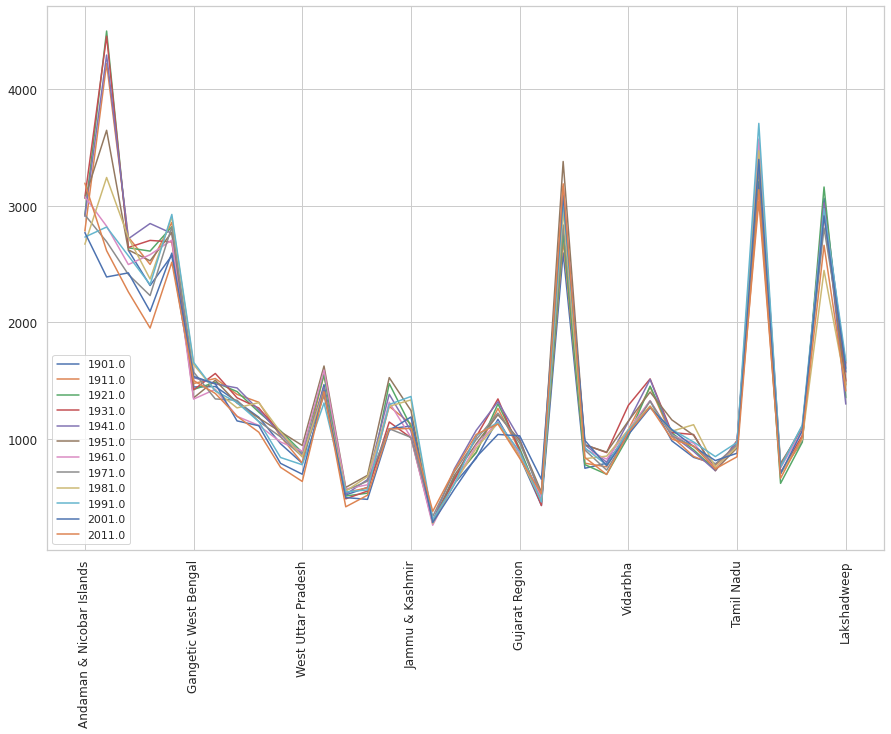

In [0]:
states=decade_data['STATE'].unique()
years=decade_data['DECADE'].unique()
line_plot_3=pd.DataFrame(index=years,columns=states)
for i in years:
  for j in states:
    a=(decade_data['DECADE']==i) 
    b= (decade_data['STATE']==j)
    x=decade_data.loc[a&b,'ANNUAL']
    #print(x)
    if  len(x.index)== 0:
      continue
    line_plot_3.loc[i,j]=pd.to_numeric(decade_data.loc[a&b,'ANNUAL'].loc[decade_data.loc[a&b,'ANNUAL'].index[0]], errors='coerce')
line_plot_3.T.plot(figsize=(15,10),legend=True,fontsize=12)
plt.xticks(rotation=90)
plt.show()
    

**Note**: *All regions are plotted in the graph , but due to width constraint on x-axis, only 8 of them are visible.*

#Next Year Rainfall Prediction -

In [0]:
dataset=original_dataset
dataset

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0,159.8,12.2,0,446.1,537.1,228.9,753.7,666.2,197.2,359,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144,0,1,235.1,479.9,728.4,326.7,339,181.2,284.4,225,2957.4,156.7,236.1,1874,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0,202.4,304.5,495.1,502,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571
4,Andaman & Nicobar Islands,1905,1.3,0,3.3,26.9,279.5,628.7,368.7,330.5,297,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180,72.8,78.1,26.7,1426.3,60.6,131.1,1057,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59,62.3,1395,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231,159,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32,74.7,1065.7,71.7,83.2,745.4,165.4


##Linear Regression

In [0]:
# pred_rainfall = []
# wt_matrix = []
# prev_state_length = 0
# for state in states:

#   #Applied Linear Regression on the Annual Rainfall Data of last 100 years for all the states.
#   state_wise_dataset = dataset.groupby('SUBDIVISION').get_group(state)['ANNUAL']
#   trainresult = state_wise_dataset
#   traindata = [[1,i] for i in range(len(trainresult))]
#   test_X = [[1,state_wise_dataset.shape[0]]]
  
#   w=np.random.randn(1,2)
#   w[0][0]=0
#   eta=0.000002
#   final_error=0
#   epochs = 20000
#   for iterate in range(0,epochs+1):
#     sum_w=np.zeros((1,2))
#     for row in range(len(traindata)):
#       sum_w[0][0]+=(traindata[row][0]*((np.dot(traindata[row],w.T))-trainresult[row+prev_state_length]))
#       sum_w[0][1]+=(traindata[row][1]*((np.dot(traindata[row],w.T))-trainresult[row+prev_state_length]))
          
#     w[0][0]-=eta*(sum_w[0][0])
#     w[0][1]-=eta*(sum_w[0][1])

#     if(iterate%1000==0):
#       error_sum=0
#       for row in range(0,len(traindata)):
#           error_sum+=abs(((np.dot(traindata[row],w.T))-trainresult[row+prev_state_length]))  ## NOTE:: update the error to sum of squares
#       print(f"Itr: {iterate}  Err: {error_sum}")
#       final_error=error_sum
  
#   print(final_error)
#   prev_state_length += state_wise_dataset.shape[0]
#   pred_rainfall.append(np.dot(test_X,w.T))
#   wt_matrix.extend(w)


In [0]:
# index=0
# state_to_next_year_predict = {}
# for key in states:
#   state_to_next_year_predict[key] = pred_rainfall[index][0][0]
#   index=index+1
# state_to_next_year_predict  # Dictionary containing states as keys and predicted rainfall as values.

Result of predicted values-
The result obtained after Linear Regression was further converted to a dictionary using the above code. The results produced by the code are written below. Since, Linear Regression takes a huge amount of time, (1 hr approx.), we have outputted the results in the bottom cell, which will save the effort of running Linear Regression.

In [0]:
state_to_next_year_predict = {'Andaman & Nicobar Islands': 3338.9754367120827,
 'Arunachal Pradesh': 3031.6070867461394,
 'Assam & Meghalaya': 2853.4770139809216,
 'Bihar': 1319.131040707151,
 'Chhattisgarh': 1489.1210260497674,
 'Coastal Andhra Pradesh': 1234.0280034101838,
 'Coastal Karnataka': 4027.6031818323927,
 'East Madhya Pradesh': 1301.0058691101121,
 'East Rajasthan': 748.842670589243,
 'East Uttar Pradesh': 1027.4624088578782,
 'Gangetic West Bengal': 1797.649055971549,
 'Gujarat Region': 1071.9588865059295,
 'Haryana Delhi & Chandigarh': 602.2832961391356,
 'Himachal Pradesh': 1397.1702303971156,
 'Jammu & Kashmir': 1385.048592494763,
 'Jharkhand': 1425.2767326202106,
 'Kerala': 3202.3430755142076,
 'Konkan & Goa': 3628.3538380780024,
 'Lakshadweep': 1809.9805646100692,
 'Madhya Maharashtra': 1080.2125470222272,
 'Matathwada': 907.905320456181,
 'Naga Mani Mizo Tripura': 2598.823872743466,
 'North Interior Karnataka': 844.4255416820145,
 'Orissa': 1633.2298280317893,
 'Punjab': 671.7752293739532,
 'Rayalseema': 906.6100014810228,
 'Saurashtra & Kutch': 628.7270241845524,
 'South Interior Karnataka': 1242.345609510141,
 'Sub Himalayan West Bengal & Sikkim': 3173.4778509835214,
 'Tamil Nadu': 1060.987352609306,
 'Telangana': 1155.9807739091598,
 'Uttarakhand': 1621.6249561428865,
 'Vidarbha': 1239.922597103569,
 'West Madhya Pradesh': 1132.687326859991,
 'West Rajasthan': 357.3787807562758,
 'West Uttar Pradesh': 898.9249372227308 }

In [0]:
sorted_state_to_next_year_predict = sorted(state_to_next_year_predict.items(), key=lambda x:x[1])
sorted_state_to_next_year_predict

[('West Rajasthan', 357.3787807562758),
 ('Haryana Delhi & Chandigarh', 602.2832961391356),
 ('Saurashtra & Kutch', 628.7270241845524),
 ('Punjab', 671.7752293739532),
 ('East Rajasthan', 748.842670589243),
 ('North Interior Karnataka', 844.4255416820145),
 ('West Uttar Pradesh', 898.9249372227308),
 ('Rayalseema', 906.6100014810228),
 ('Matathwada', 907.905320456181),
 ('East Uttar Pradesh', 1027.4624088578782),
 ('Tamil Nadu', 1060.987352609306),
 ('Gujarat Region', 1071.9588865059295),
 ('Madhya Maharashtra', 1080.2125470222272),
 ('West Madhya Pradesh', 1132.687326859991),
 ('Telangana', 1155.9807739091598),
 ('Coastal Andhra Pradesh', 1234.0280034101838),
 ('Vidarbha', 1239.922597103569),
 ('South Interior Karnataka', 1242.345609510141),
 ('East Madhya Pradesh', 1301.0058691101121),
 ('Bihar', 1319.131040707151),
 ('Jammu & Kashmir', 1385.048592494763),
 ('Himachal Pradesh', 1397.1702303971156),
 ('Jharkhand', 1425.2767326202106),
 ('Chhattisgarh', 1489.1210260497674),
 ('Uttarakh

Mean and Standard Deviation of rainfall for 100 years.

In [0]:
std_rainfall = data.groupby('SUBDIVISION').std()['ANNUAL']
mean_rainfall = data.groupby('SUBDIVISION').mean()['ANNUAL']

##Plotting the Predicted Rainfall Curve

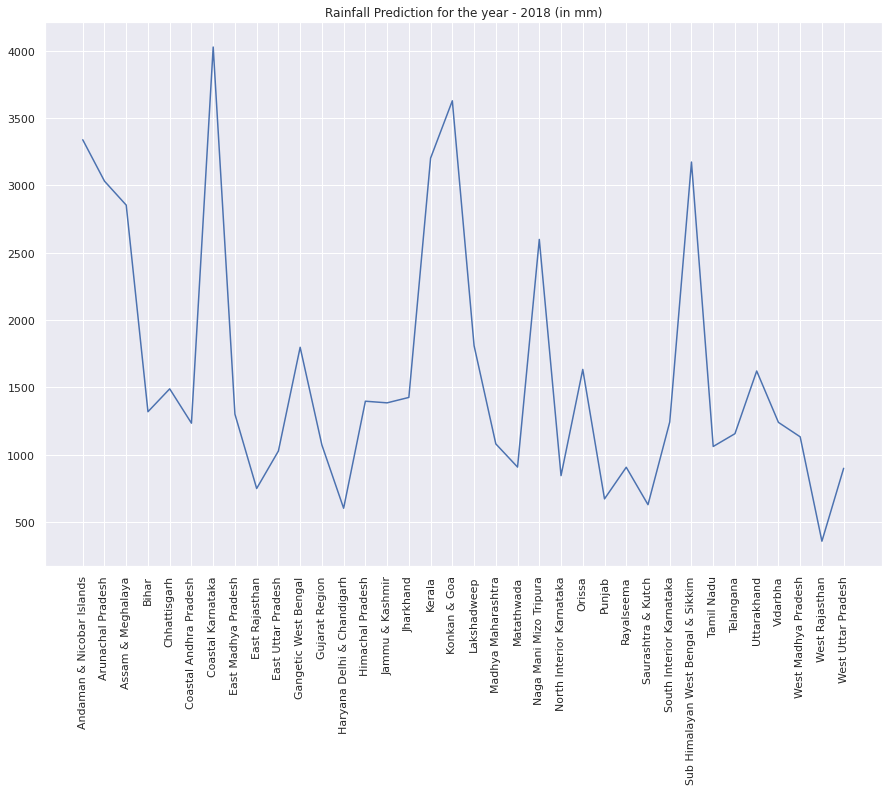

In [0]:
lists = sorted(state_to_next_year_predict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Rainfall Prediction for the year - 2018 (in mm)')
plt.xticks(x, rotation='vertical')
plt.show()

##Predicting High Fluctuation Areas

The high fluctuation areas are obtained based on the past years rainfall 

In [0]:
high_fluctuation_states = []
for state,rainfall_std in std_rainfall.items():
  if rainfall_std>400:
    high_fluctuation_states.append(state)
high_fluctuation_states

['Andaman & Nicobar Islands',
 'Arunachal Pradesh',
 'Coastal Karnataka',
 'Kerala',
 'Konkan & Goa',
 'Naga Mani Mizo Tripura']

##Plotting the Fluctuations

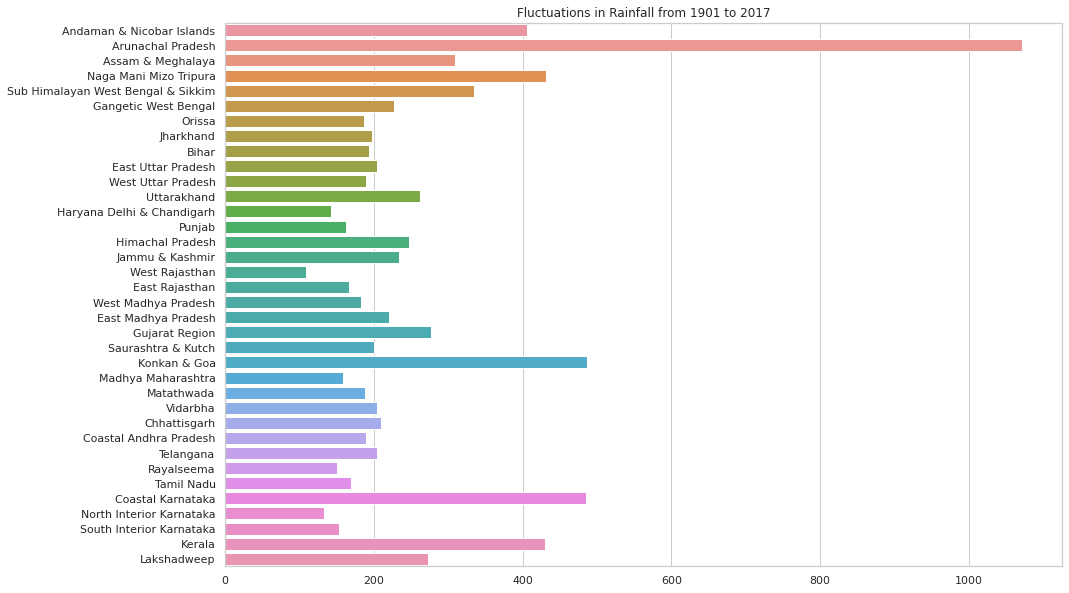

In [0]:
sns.set(style="whitegrid")
std_rainfall2=[std_rainfall[state] for state in states]
ax = sns.barplot(x=std_rainfall2, y=states).set_title('Fluctuations in Rainfall from 1901 to 2017')

##DBSCAN (Density Based Clustering Method) 

---
## This is used for predicting drought and flood prone Areas


Here the minPts and radius are hyperparameters to DBSCAN

In [0]:
adj_matrix = np.zeros((36,36))
minPts=2
radius=95

adj_matrix stores the points which lie in the circle of that core point.

In [0]:
for i in range(36):
  for j in range(i,36):
    distance=abs(sorted_state_to_next_year_predict[i][1]-sorted_state_to_next_year_predict[j][1])
    if distance<=radius:
      adj_matrix[i][j]=1
      adj_matrix[j][i]=1

The core points are obtained which have >=minPts in their circle.

In [0]:
core_pts=[]
for i in range(36):
  sum=0
  for j in range(36):
    sum+=adj_matrix[i][j]
  if sum>=minPts:
    core_pts.append(i)
print(core_pts)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32]


This algorithm is used to find the density reachable points from a given core point.

In [0]:
def dbscan(pt,cluster_index):
  visited[pt]=cluster_index
  for i in range(36):
    if visited[i]==0 and adj_matrix[pt][i]==1:
      dbscan(i,cluster_index)

In [0]:
visited=np.zeros(36)
cluster_index=1
for core in core_pts:
  if visited[core]==0:
    dbscan(core,cluster_index)
    cluster_index+=1

In [0]:
visited

array([0., 1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 4., 5., 5., 0., 0., 0., 6., 6., 0.,
       0., 0.])

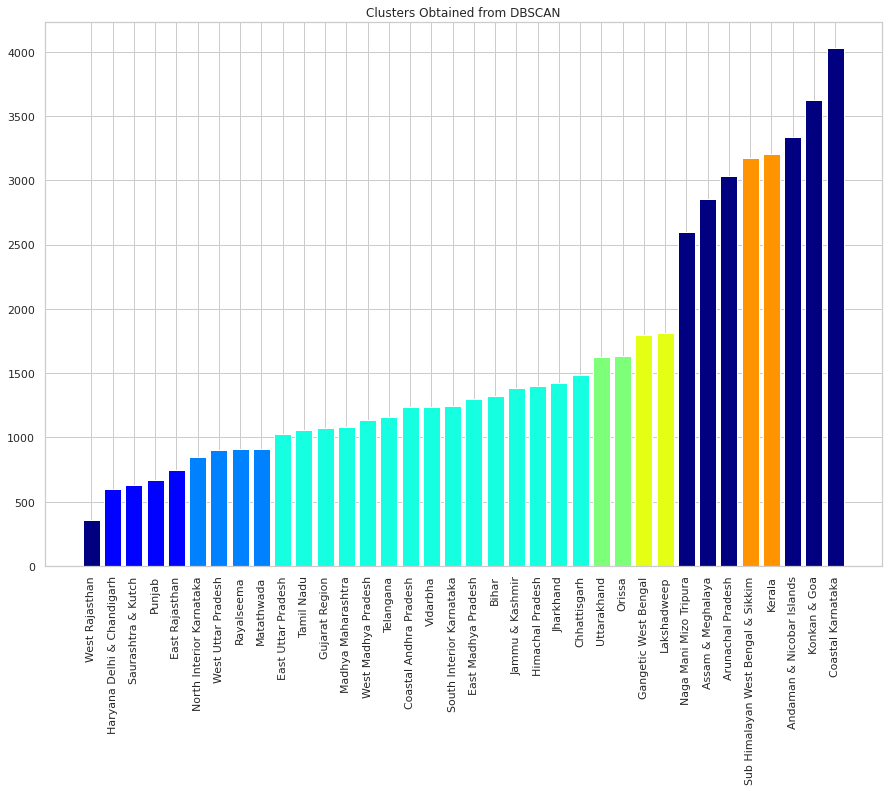

In [0]:
x, y = zip(*sorted_state_to_next_year_predict) # unpack a list of pairs into two tuples
fig, ax = plt.subplots(1, 1)
 
# Get a color map
my_cmap = cm.get_cmap('jet')
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)

ax.bar(x, y, color=my_cmap(my_norm(visited)))
plt.title('Clusters Obtained from DBSCAN')
plt.xticks(x, rotation='vertical')
plt.show()

#Monsoon Season Prediction (JJAS)

##Linear Regression

In [0]:
# pred_rainfall = []
# wt_matrix = []
# #Standard Linear Regression
# for state in states:
#   state_wise_dataset = dataset.groupby('SUBDIVISION').get_group(state)['JJAS']
#   trainresult = state_wise_dataset
#   traindata = [[1,i] for i in range(len(trainresult))]
#   test_X = [[1,state_wise_dataset.shape[0]]]
  
#   w=np.random.randn(1,2)
#   w[0][0]=0
#   eta=0.000002
#   final_error=0
#   epochs = 2000
#   for iterate in range(0,epochs+1):
#       sum_w=np.zeros((1,2))
#       for row in range(0,len(traindata)):
#           sum_w[0][0]+=(traindata[row][0]*((np.dot(traindata[row],w.T))-trainresult[row]))
#           sum_w[0][1]+=(traindata[row][1]*((np.dot(traindata[row],w.T))-trainresult[row]))

#       w[0][0]-=eta*(sum_w[0][0])
#       w[0][1]-=eta*(sum_w[0][1])

#       if(iterate%1000==0):
#         error_sum=0
#         for row in range(0,len(traindata)):
#             error_sum+=abs(((np.dot(traindata[row],w.T))-trainresult[row]))  ## NOTE:: update the error to sum of squares
#         print(f"Itr: {iterate}  Err: {error_sum}")
#         final_error=error_sum
#   print(final_error)
#   pred_rainfall.append(np.dot(test_X,w.T))
#   # wt_matrix.extend(w)


In [0]:
# index=0
# state_to_next_year_monsoon_predict = {}
# for key in states:
#   state_to_next_year_monsoon_predict[key] = pred_rainfall[index][0][0]
#   index=index+1
# state_to_next_year_monsoon_predict

In [0]:
state_to_next_year_monsoon_predict = {'Andaman & Nicobar Islands': 1924.8391309777421,
 'Arunachal Pradesh': 1905.2107077551173,
 'Assam & Meghalaya': 1919.2512266135914,
 'Bihar': 1114.290008810751,
 'Chhattisgarh': 1334.0840523188106,
 'Coastal Andhra Pradesh': 783.8266074758972,
 'Coastal Karnataka': 3568.314314658871,
 'East Madhya Pradesh': 1176.748493465736,
 'East Rajasthan': 695.7086003632536,
 'East Uttar Pradesh': 908.7738388420688,
 'Gangetic West Bengal': 1374.7399053300496,
 'Gujarat Region': 1032.687244766342,
 'Haryana Delhi & Chandigarh': 498.09386700005996,
 'Himachal Pradesh': 816.3574016407189,
 'Jammu & Kashmir': 631.2543626414731,
 'Jharkhand': 1193.5412583716118,
 'Kerala': 2206.1870661508956,
 'Konkan & Goa': 3412.289197657629,
 'Lakshadweep': 1179.8632047175047,
 'Madhya Maharashtra': 923.8726341309214,
 'Matathwada': 761.089503858326,
 'Naga Mani Mizo Tripura': 1692.2856106003785,
 'North Interior Karnataka': 597.3983452887029,
 'Orissa': 1312.6709956829675,
 'Punjab': 529.8433358632432,
 'Rayalseema': 482.25563184074406,
 'Saurashtra & Kutch': 591.9212783289381,
 'South Interior Karnataka': 846.6239290502587,
 'Sub Himalayan West Bengal & Sikkim': 2389.736488600133,
 'Tamil Nadu': 382.369615864252,
 'Telangana': 945.3558637134036,
 'Uttarakhand': 1239.4734384615435,
 'Vidarbha': 1103.3790791886763,
 'West Madhya Pradesh': 1023.496058366365,
 'West Rajasthan': 313.13126080335826,
 'West Uttar Pradesh': 790.421047363824}


In [0]:
sorted_state_to_next_year_monsoon_predict = sorted(state_to_next_year_monsoon_predict.items(), key=lambda x:x[1])
sorted_state_to_next_year_monsoon_predict

[('West Rajasthan', 313.13126080335826),
 ('Tamil Nadu', 382.369615864252),
 ('Rayalseema', 482.25563184074406),
 ('Haryana Delhi & Chandigarh', 498.09386700005996),
 ('Punjab', 529.8433358632432),
 ('Saurashtra & Kutch', 591.9212783289381),
 ('North Interior Karnataka', 597.3983452887029),
 ('Jammu & Kashmir', 631.2543626414731),
 ('East Rajasthan', 695.7086003632536),
 ('Matathwada', 761.089503858326),
 ('Coastal Andhra Pradesh', 783.8266074758972),
 ('West Uttar Pradesh', 790.421047363824),
 ('Himachal Pradesh', 816.3574016407189),
 ('South Interior Karnataka', 846.6239290502587),
 ('East Uttar Pradesh', 908.7738388420688),
 ('Madhya Maharashtra', 923.8726341309214),
 ('Telangana', 945.3558637134036),
 ('West Madhya Pradesh', 1023.496058366365),
 ('Gujarat Region', 1032.687244766342),
 ('Vidarbha', 1103.3790791886763),
 ('Bihar', 1114.290008810751),
 ('East Madhya Pradesh', 1176.748493465736),
 ('Lakshadweep', 1179.8632047175047),
 ('Jharkhand', 1193.5412583716118),
 ('Uttarakhand',

In [0]:
std_rainfall = data.groupby('SUBDIVISION').std()['JJAS']
mean_rainfall = data.groupby('SUBDIVISION').mean()['JJAS']

##Plotting the Predicted Rainfall Curve

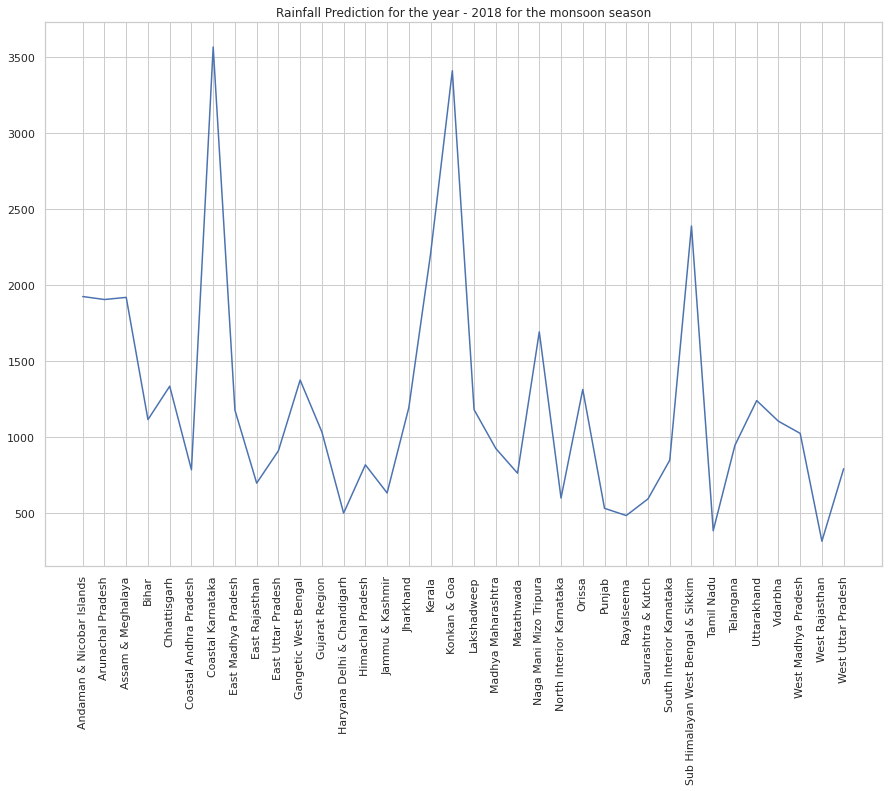

In [0]:
lists = sorted(state_to_next_year_monsoon_predict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.title('Rainfall Prediction for the year - 2018 for the monsoon season')
plt.xticks(x, rotation='vertical')
plt.show()

##Predicting High Fluctuation Areas

In [0]:
high_fluctuation_states = []
for state,rainfall_std in std_rainfall.items():
  if rainfall_std>400:
    high_fluctuation_states.append(state)
high_fluctuation_states

['Arunachal Pradesh', 'Coastal Karnataka', 'Konkan & Goa']

##Plotting the Fluctuations

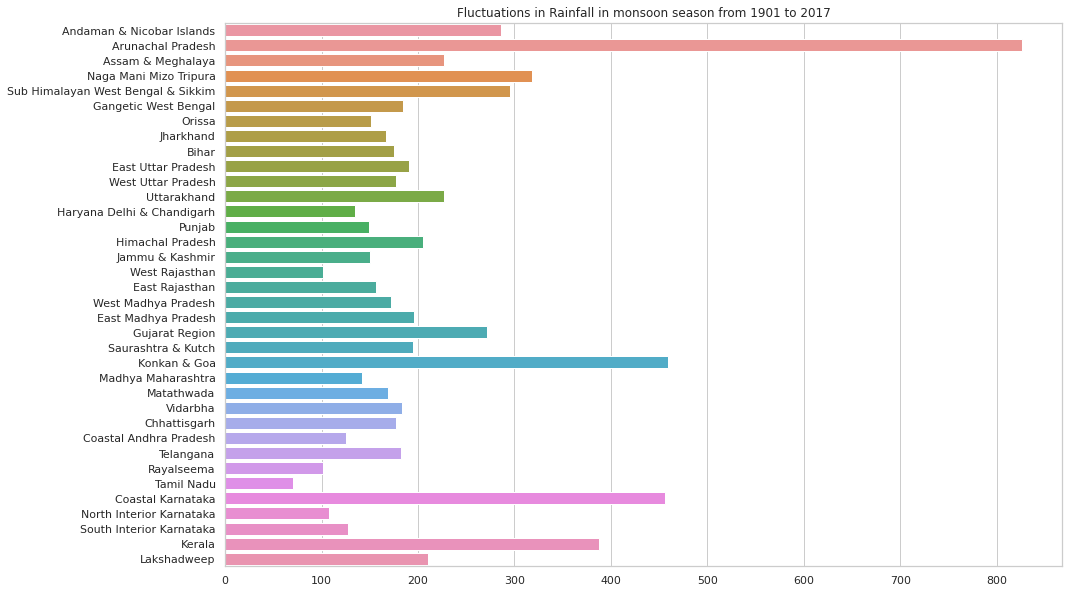

In [0]:
sns.set(style="whitegrid")
std_rainfall2=[std_rainfall[state] for state in states]
ax = sns.barplot(x=std_rainfall2, y=states).set_title('Fluctuations in Rainfall in monsoon season from 1901 to 2017')

##Drought and Flood Areas

In [0]:
drought_areas = []
for i in range(5):
  drought_areas.append(sorted_state_to_next_year_monsoon_predict[i][0])
(drought_areas)

['West Rajasthan',
 'Tamil Nadu',
 'Rayalseema',
 'Haryana Delhi & Chandigarh',
 'Punjab']

In [0]:
flood_areas = []
for i in range(7):
  flood_areas.append(sorted_state_to_next_year_monsoon_predict[len(states)-1-i][0])
(flood_areas)

['Coastal Karnataka',
 'Konkan & Goa',
 'Sub Himalayan West Bengal & Sikkim',
 'Kerala',
 'Andaman & Nicobar Islands',
 'Assam & Meghalaya',
 'Arunachal Pradesh']

In [0]:
normal_areas = []
for i in range(5,29):
  normal_areas.append(sorted_state_to_next_year_monsoon_predict[i][0])
(normal_areas)

['Saurashtra & Kutch',
 'North Interior Karnataka',
 'Jammu & Kashmir',
 'East Rajasthan',
 'Matathwada',
 'Coastal Andhra Pradesh',
 'West Uttar Pradesh',
 'Himachal Pradesh',
 'South Interior Karnataka',
 'East Uttar Pradesh',
 'Madhya Maharashtra',
 'Telangana',
 'West Madhya Pradesh',
 'Gujarat Region',
 'Vidarbha',
 'Bihar',
 'East Madhya Pradesh',
 'Lakshadweep',
 'Jharkhand',
 'Uttarakhand',
 'Orissa',
 'Chhattisgarh',
 'Gangetic West Bengal',
 'Naga Mani Mizo Tripura']

##Plotting the Flood, Normal and Drought Prone Areas

In [0]:
drf_colour={}
for state in drought_areas:
  drf_colour[state]='orange'
for state in normal_areas:
  drf_colour[state]='blue'
for state in flood_areas:
  drf_colour[state]='red'


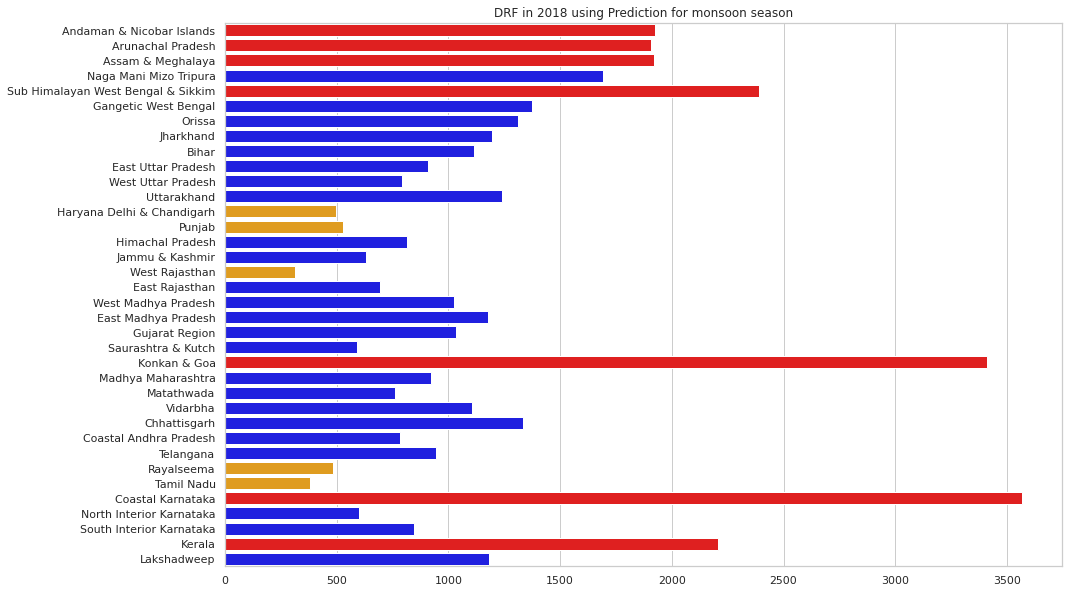

In [0]:
sns.set(style="whitegrid")
drf_values=[state_to_next_year_monsoon_predict[state] for state in states]
ax = sns.barplot(x=drf_values, y=states,palette=drf_colour).set_title('DRF in 2018 using Prediction for monsoon season')

#Crop Yield

In [0]:
state_to_main_crop = {'Andaman & Nicobar Islands': 'Paddy',
 'Arunachal Pradesh': 'Paddy',
 'Assam & Meghalaya': 'Tea',
 'Bihar': 'Jute',
 'Chhattisgarh': 'Paddy',
 'Coastal Andhra Pradesh': 'Groundnut',
 'Coastal Karnataka': 'Coffee',
 'East Madhya Pradesh': 'Wheat',
 'East Rajasthan': 'Barley',
 'East Uttar Pradesh': 'Wheat',
 'Gangetic West Bengal': 'Paddy',
 'Gujarat Region': 'Bajra',
 'Haryana Delhi & Chandigarh': 'Wheat',
 'Himachal Pradesh': 'Wheat',
 'Jammu & Kashmir': 'Apples',
 'Jharkhand': 'Paddy',
 'Kerala': 'Tea',
 'Konkan & Goa': 'Paddy',
 'Lakshadweep': 'Jowar',
 'Madhya Maharashtra': 'Barley',
 'Matathwada':'Barley',
 'Naga Mani Mizo Tripura': 'Paddy',
 'North Interior Karnataka': 'Paddy',
 'Orissa': 'Paddy',
 'Punjab': 'Wheat',
 'Rayalseema': 'Groundnut',
 'Saurashtra & Kutch': 'Cotton',
 'South Interior Karnataka': 'Paddy',
 'Sub Himalayan West Bengal & Sikkim': 'Paddy',
 'Tamil Nadu': 'Paddy',
 'Telangana': 'Paddy',
 'Uttarakhand': 'Paddy',
 'Vidarbha': 'Cotton',
 'West Madhya Pradesh': 'Wheat',
 'West Rajasthan': 'Barley',
 'West Uttar Pradesh': 'Wheat' }

In [0]:
crop_shortage_states = {}
for val in range(len(visited)):
  if visited[val] <=1 or visited[val]>=6 or visited[val] == 0:
    crop_shortage_states[sorted_state_to_next_year_predict[val][0]] = state_to_main_crop[sorted_state_to_next_year_predict[val][0]]
print("The states : crops for which shortage will be there are :\n",crop_shortage_states)

The states : crops for which shortage will be there are :
 {'West Rajasthan': 'Barley', 'Haryana Delhi & Chandigarh': 'Wheat', 'Saurashtra & Kutch': 'Cotton', 'Punjab': 'Wheat', 'East Rajasthan': 'Barley', 'Naga Mani Mizo Tripura': 'Paddy', 'Assam & Meghalaya': 'Tea', 'Arunachal Pradesh': 'Paddy', 'Sub Himalayan West Bengal & Sikkim': 'Paddy', 'Kerala': 'Tea', 'Andaman & Nicobar Islands': 'Paddy', 'Konkan & Goa': 'Paddy', 'Coastal Karnataka': 'Coffee'}
